# tf_flower dataset image Classification using transfer learning

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:

# Load the feature extractor from TensorFlow Hub
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=(224, 224, 3),
    trainable=False
)


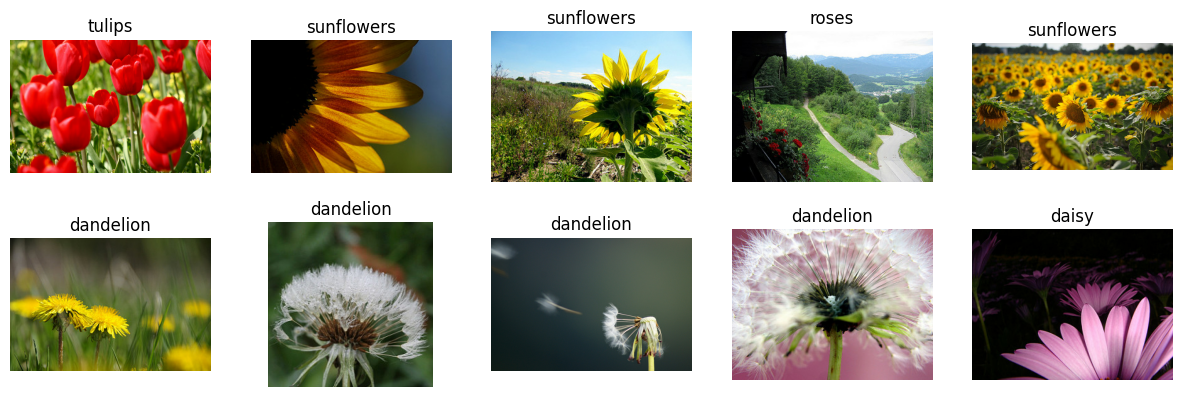

In [29]:
# Load the dataset
dataset, info = tfds.load("tf_flowers", split="train", as_supervised=True, with_info=True)
# Load the dataset with labels

dataset = dataset.take(10)
# Get the class names
class_names = info.features["label"].names

# Number of images in the dataset
total_images = info.splits["train"].num_examples

def show_all_samples(dataset, class_names, num_images=10):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.take(num_images)):  # Take only 30 images to avoid overloading
        plt.subplot(6, 5, i + 1)  # 6 rows, 5 columns grid
        plt.imshow(image.numpy())
        plt.title(class_names[label.numpy()])
        plt.axis("off")
    plt.show()

# Call function to display images
show_all_samples(dataset, class_names, num_images=10)

In [30]:
# Get class names
class_names = info.features["label"].names
pd.DataFrame(class_names)

,0
0,dandelion
1,daisy
2,tulips
3,sunflowers
4,roses


In [31]:

# Define the custom model class
class MyModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(MyModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.fc = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.feature_extractor(inputs)
        x = self.fc(x)
        return x

# Instantiate the model
num_classes = 5 
model = MyModel(num_classes)


In [32]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# model.summary()

In [51]:
dataset, info = tfds.load("tf_flowers", split="train", as_supervised=True, with_info=True)

In [52]:
# Set the validation split ratio (e.g., 80% train, 20% validation)
train_size = int(0.8 * info.splits['train'].num_examples)
val_size = info.splits['train'].num_examples - train_size

# Creatng train and validation splits
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)


In [53]:

# Define image size
IMG_SIZE = 224  
BATCH_SIZE = 32 

# Preprocessing function
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Preprocess datasets
train_dataset = train_dataset.map(preprocess_image).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [54]:
# Compile the model
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [55]:
# Train the model
history = model.fit(train_dataset,
                    epochs=10,  # You can adjust the number of epochs
                    validation_data=val_dataset)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 87s 900ms/step - accuracy: 0.6468 - loss: 0.9145 - val_accuracy: 0.8624 - val_loss: 0.4105
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 894ms/step - accuracy: 0.8909 - loss: 0.3578 - val_accuracy: 0.8910 - val_loss: 0.3221
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 913ms/step - accuracy: 0.9177 - loss: 0.2740 - val_accuracy: 0.8992 - val_loss: 0.2866
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 866ms/step - accuracy: 0.9345 - loss: 0.2275 - val_accuracy: 0.9128 - val_loss: 0.2677
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9478 - loss: 0.1955 - val_accuracy: 0.9169 - val_loss: 0.2566
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9601 - loss: 0.1714 - val_accuracy: 0.9183 - val_loss: 0.2498
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9669 - loss: 0.1524 - val_accuracy: 0.9210 - val_loss: 0.2457
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9718 - loss: 0.1368 - val_accuracy: 0.

In [56]:
# Evaluate the model

test_loss, test_accuracy = model.evaluate(val_dataset, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

23/23 - 22s - 977ms/step - accuracy: 0.9155 - loss: 0.2418
Test loss: 0.24182376265525818
Test accuracy: 0.9155313372612


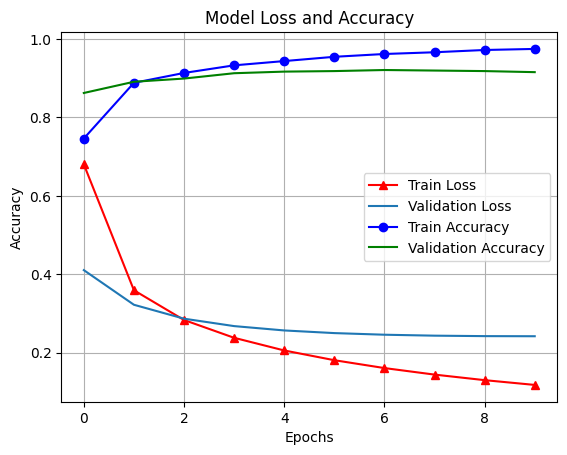

In [57]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], 'r^-', label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'g-', label='Validation Accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

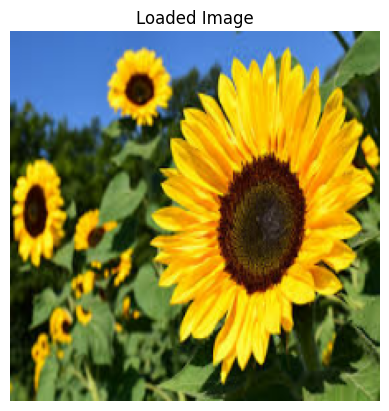

In [76]:
import os

# Specify the image path
# image_path = 'image_samples/rose.jpg'
# image_path = 'image_samples/2.jpg'
# image_path = 'image_samples/3.jpg'
# image_path = 'image_samples/4.jpg'
# image_path = 'image_samples/dandrion.jpg'
image_path = 'image_samples/download.jpg'

# Preprocess the image
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))

# Normalize the image to the [0, 1] range for correct display
img = tf.cast(img, tf.float32) / 255.0

# Display the image before prediction to check if it's correct
plt.imshow(img) 
plt.title("Loaded Image")
plt.axis('off')
plt.show()

In [77]:
print(f"Predicted class index: {predicted_class}")
print(f"Predicted class name: {class_names[predicted_class]}")


Predicted class index: 4
Predicted class name: roses


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


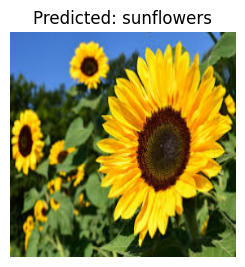

Predicted class: sunflowers


In [78]:
# Extract the image name from the path
image_name = os.path.basename(image_path)

# Preprocess the image
img = tf.io.read_file(image_path)
img_original = tf.image.decode_jpeg(img, channels=3)  # Original image for display
img_resized = tf.image.resize(img_original, (IMG_SIZE, IMG_SIZE))  # Resize for prediction
img_resized = tf.cast(img_resized, tf.float32) / 255.0  # Normalize the image
img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension

# Make a prediction
predictions = model.predict(img_resized)
predicted_class = np.argmax(predictions)


# Show the resized image used for prediction
plt.subplot(1, 2, 2)
plt.imshow(img_resized[0])
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')

plt.show()

print(f"Predicted class: {class_names[predicted_class]}")


### Overview

Here we see that our model has been able to predict the correct output as shown in the images above using mobilenet_v2 /transfer learning

1. We loaded the tf_flower dataset
2. we splited the data into a train set and test set
3. we visualized some sample data in the train train dataset
4. we created the model layer
5. we evaluated the model to find the loss and accuracy
6. we visualized the loss and accuracy
7. we predicted the model output on the train set
8. we visualized the model output

#### About the Author

    Name:  Kaitale Muhammad
    Email: kaitalemuhammad1@gmail.com
    Tel:   +256-780531741